In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [456]:
file_path = r'C:\Users\16479\Downloads\data_set_hackathon.csv'
dataset = pd.read_csv(file_path)

In [457]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_date               2420 non-null   object 
 1   requested_delivery_date  2420 non-null   object 
 2   Customer Country Code    2420 non-null   object 
 3   Product Code             2420 non-null   object 
 4   Description              2420 non-null   object 
 5   order_type               2420 non-null   object 
 6   Customer Order Code      2420 non-null   int64  
 7   value                    2420 non-null   float64
 8   Curr                     2420 non-null   object 
 9   items                    2420 non-null   object 
 10  Route                    2420 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.1+ KB


In [458]:
dataset.head(5)

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001


In [459]:
dataset['items'].replace(r"\N", "0", inplace=True)

In [460]:
dataset['value'] = pd.to_numeric(dataset['value'], errors='coerce')
dataset['items'] = pd.to_numeric(dataset['items'], errors='coerce')

In [461]:
dataset.head(5)

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001


In [462]:
dataset['order_date'] = pd.to_datetime(dataset['order_date'], format='%d.%m.%Y', errors='coerce')
dataset['requested_delivery_date'] = pd.to_datetime(dataset['requested_delivery_date'], format='%d.%m.%Y', errors='coerce')

In [463]:
summary = dataset['items'].describe(include='all')
summary

count    2420.000000
mean        7.103719
std        18.408988
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max       410.000000
Name: items, dtype: float64

In [464]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   int64         
 10  Route                    2420 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 208.1+ KB


In [465]:
dataset['Lead Time'] = (dataset['requested_delivery_date'] - dataset['order_date']).dt.days
dataset['Month'] = dataset['order_date'].dt.month

In [466]:
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

# Apply the function to the dataset
dataset['Season'] = dataset['Month'].apply(map_month_to_season)

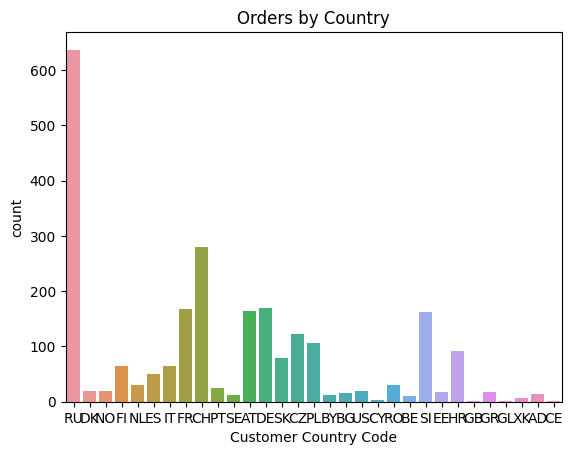

In [467]:
sns.countplot(data=dataset, x='Customer Country Code')
plt.title('Orders by Country')
plt.show()

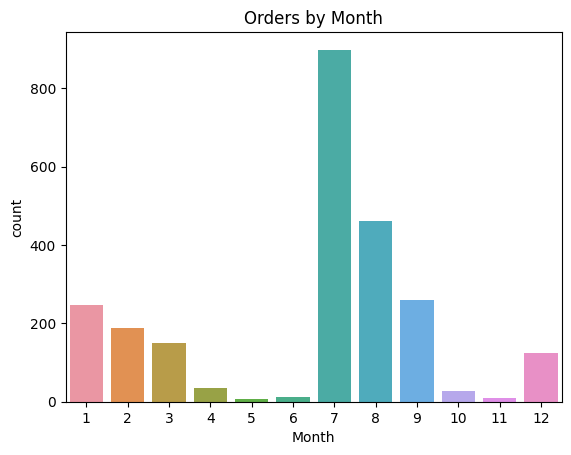

In [468]:
sns.countplot(data=dataset, x='Month')
plt.title('Orders by Month')
plt.show()

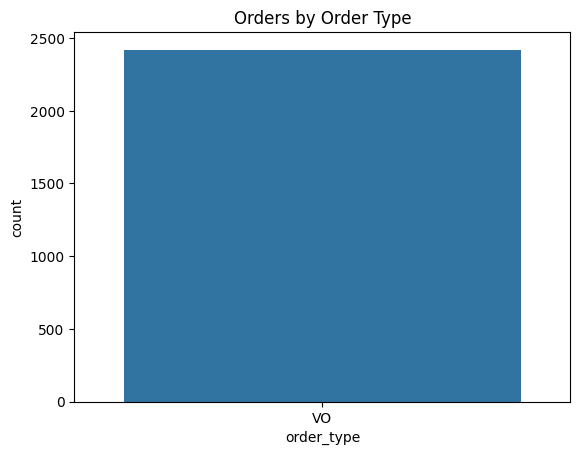

In [469]:
sns.countplot(data=dataset, x='order_type')
plt.title('Orders by Order Type')
plt.show()

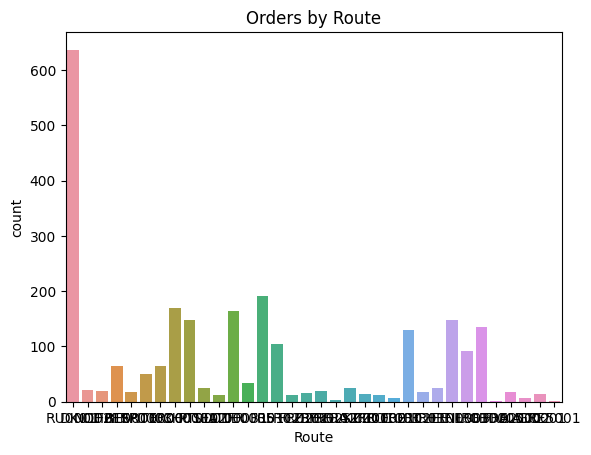

In [470]:
sns.countplot(data=dataset, x='Route')
plt.title('Orders by Route')
plt.show()

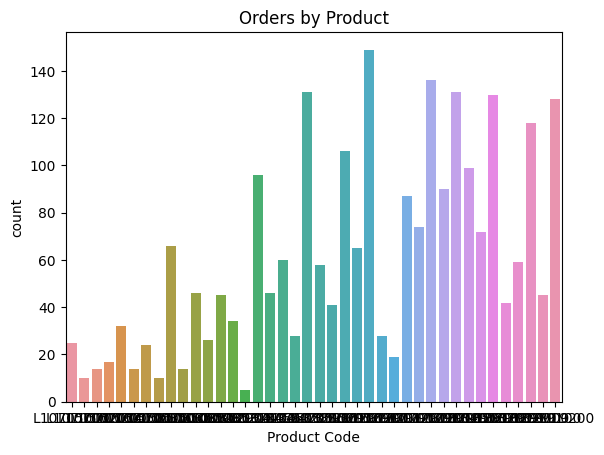

In [471]:
sns.countplot(data=dataset, x='Product Code')
plt.title('Orders by Product')
plt.show()

In [472]:
average_price_per_sku = dataset.groupby('Product Code')['value'].mean()
average_price_per_sku

Product Code
L10705000    3061.209600
L10705100    3616.306000
L10705200    3196.216429
L10705300    4541.545294
L10705400    3732.037188
L10705500    4482.033571
L10705600    2769.252917
L10705700    2624.684000
L10850600    1509.436061
L10850700     112.817143
L10850800     630.555217
L10850900    2661.950385
L10852800    1205.799333
L10852900     519.593824
L10853100    2299.782000
L12134400    2482.576771
L12134500    2152.254130
L12134600    1521.175833
L12134700     308.806071
L12135800     250.673893
L12135900     916.375345
L12136000     132.977317
L12136100     427.990472
L12916800     196.409385
L12916900     205.449597
L12917000      65.745714
L12917100      73.195263
L12917700      80.268161
L12917800    2078.667568
L12917900     918.062279
L12918000     175.177000
L12918400    2248.132977
L12918500    1936.673131
L12918600    2362.803056
L12918700    1480.626077
L12918800      46.098095
L12918900     636.242881
L12919000     621.442288
L12919100    1221.783111
L12919200   

In [473]:
average_price_per_month = dataset.groupby('Month')['value'].mean()
average_price_per_month

Month
1      270.914228
2      595.125745
3      316.499664
4      266.001429
5      368.058750
6       80.756154
7     1990.693374
8      591.478891
9      136.121000
10      30.278571
11    1420.469000
12    3721.961600
Name: value, dtype: float64

In [474]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

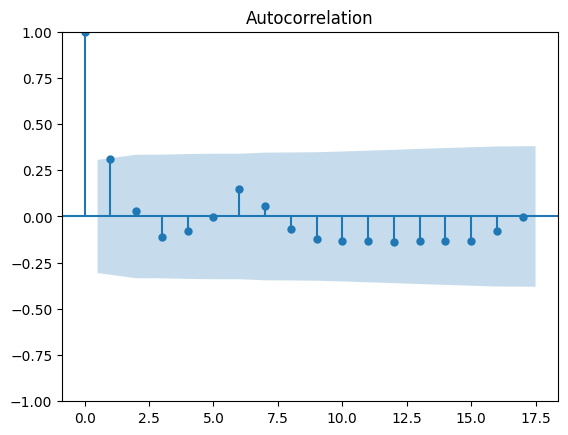

In [475]:
monthly_demand = dataset.resample('M', on='order_date')['items'].sum()
plot_acf(monthly_demand)
plt.show()


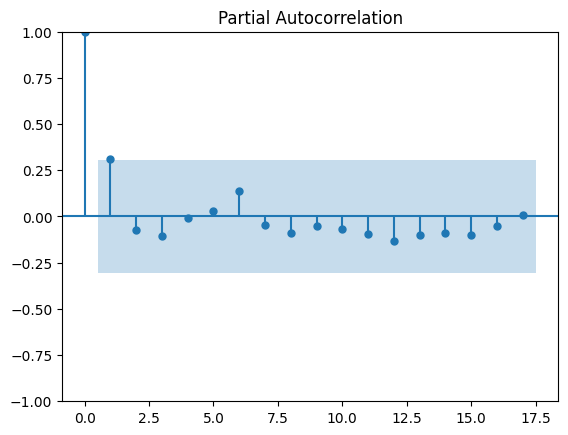

In [476]:
plot_pacf(monthly_demand)
plt.show()

In [477]:
sarima_model = SARIMAX(monthly_demand, 
                       order=(1, 0, 1), 
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_results = sarima_model.fit()
sarima_results

C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [478]:
sarima_model = SARIMAX(monthly_demand, 
                       order=(1, 0, 1), 
                       seasonal_order=(1, 1, 0, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_results = sarima_model.fit()
sarima_results

In [479]:
future_demand_forecast = sarima_results.get_forecast(steps=12).predicted_mean


In [480]:
future_demand_forecast

2012-12-31     732.780691
2013-01-31    1748.847518
2013-02-28     868.530529
2013-03-31     269.365404
2013-04-30      47.167247
2013-05-31      14.055622
2013-06-30      44.725746
2013-07-31    6567.723473
2013-08-31    2390.428600
2013-09-30     975.826544
2013-10-31      61.548172
2013-11-30      57.146255
Freq: M, Name: predicted_mean, dtype: float64

                                      SARIMAX Results                                      
Dep. Variable:                               items   No. Observations:                   41
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                -106.451
Date:                             Mon, 11 Dec 2023   AIC                            220.902
Time:                                     17:18:36   BIC                            223.992
Sample:                                 07-31-2009   HQIC                           221.060
                                      - 11-30-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3437      0.103      3.346      0.001       0.142       0.545
ma.L1          0.0863      

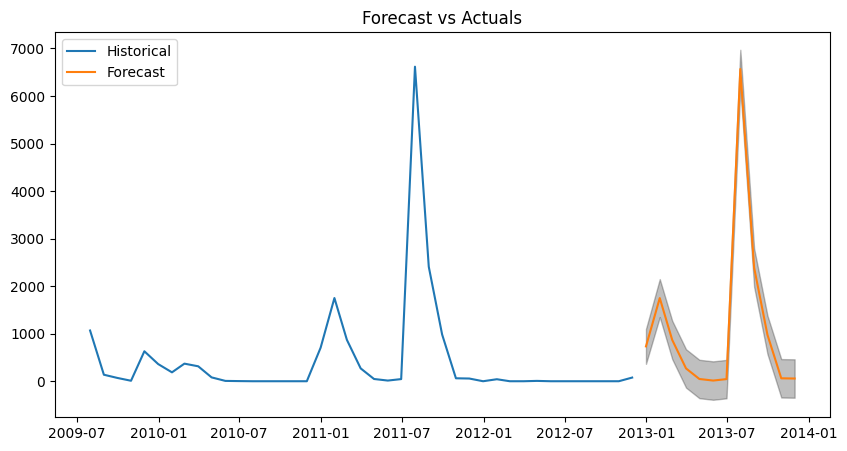

In [481]:
forecast_results = sarima_results.get_forecast(steps=12)

# Retrieve the forecast and its confidence intervals
future_demand_forecast = forecast_results.predicted_mean
forecast_conf = forecast_results.conf_int()

# Evaluate the model
print(sarima_results.summary())

# Plotting the forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_demand, label='Historical')
plt.plot(future_demand_forecast, label='Forecast')
plt.fill_between(forecast_conf.index, 
                 forecast_conf.iloc[:, 0], 
                 forecast_conf.iloc[:, 1], color='k', alpha=.25)
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

In [482]:
from sklearn.metrics import classification_report

In [483]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   int64         
 10  Route                    2420 non-null   object        
 11  Lead Time                2420 non-null   int64         
 12  Month                    2420 non-

In [484]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

In [488]:
X = dataset[['value', 'Lead Time', 'Month','Product Code', 'Customer Country Code' ,'Route']]
y = dataset['items']

# Define a preprocessor that will one-hot encode 'Route' and scale 'value' and 'Lead Time'
# Other columns ('Month') will be passed through without transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['value', 'Lead Time', 'Month']),
        ('cat', OneHotEncoder(), [ 'Route', 'Product Code', 'Customer Country Code'])
    ]
)

# Define the logistic regression model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='newton-cg'))])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logistic_regression_model = pipeline

# For example, to train the model:
logistic_regression_model.fit(X_train, y_train)

# To make predictions:
y_pred = logistic_regression_model.predict(X_test)

# To generate a classification report:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        94
           1       0.64      0.51      0.57        57
           2       0.00      0.00      0.00        19
           3       0.32      0.34      0.33        61
           4       0.33      0.73      0.46        84
           5       0.45      0.46      0.46        71
           6       0.31      0.31      0.31        91
           7       0.18      0.13      0.15        62
           8       0.41      0.36      0.38        56
           9       0.00      0.00      0.00        15
          10       0.25      0.39      0.31        28
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        17
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        10
          15       1.00      0.10      0.18        10
          16       0.07      0.33      0.11         3
          18       0.00    

C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

In [499]:
# Define a threshold for urgent orders
threshold = 30

# Calculate the historical proportion of urgent orders
dataset['Is Urgent'] = (dataset['Lead Time'] <= threshold).astype(int)
urgent_proportion = dataset['Is Urgent'].mean()

# Get the forecast of total demand from SARIMA model
aggregate_demand_forecast = sarima_results.get_forecast(steps=12).predicted_mean

# Predict choice probabilities using the logistic regression model
choice_probabilities = logistic_regression_model.predict_proba(X_test)


In [500]:
aggregate_demand_forecast

2012-12-31     732.780691
2013-01-31    1748.847518
2013-02-28     868.530529
2013-03-31     269.365404
2013-04-30      47.167247
2013-05-31      14.055622
2013-06-30      44.725746
2013-07-31    6567.723473
2013-08-31    2390.428600
2013-09-30     975.826544
2013-10-31      61.548172
2013-11-30      57.146255
Freq: M, Name: predicted_mean, dtype: float64

In [501]:
choice_probabilities

array([[9.37200946e-001, 3.43798867e-003, 2.54781961e-003, ...,
        3.13182672e-007, 2.94863213e-007, 1.93422613e-007],
       [5.60959306e-173, 3.81779891e-003, 3.10402949e-002, ...,
        8.90194926e-004, 8.44631408e-004, 1.33217859e-003],
       [0.00000000e+000, 4.46793370e-010, 1.17143296e-003, ...,
        2.64188755e-004, 2.44578517e-004, 6.05889315e-004],
       ...,
       [3.98950389e-055, 3.64483363e-002, 3.63535374e-002, ...,
        2.97436398e-005, 2.70494931e-005, 6.75492690e-005],
       [4.56411117e-055, 4.79079769e-002, 3.09515326e-002, ...,
        1.87345985e-005, 1.70023995e-005, 4.14011171e-005],
       [1.88712250e-035, 5.92021307e-002, 2.44758780e-002, ...,
        3.05761778e-005, 3.07119527e-005, 8.85486850e-005]])